In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder , OneHotEncoder 
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [2]:
# -1 Importez le dataset
data = pd.read_csv("spotify_churn_dataset.csv")

# 1. Nettoyage 

In [3]:
#1. Vérifiez l’existence de doublons : 
data.duplicated().sum()

0

In [59]:
#donc il n'exist pas de doublons

In [60]:
#2. Traitez les valeurs manquantes :
data.isna().sum()

user_id                  0
subscription_type        0
country                  0
avg_daily_minutes        0
number_of_playlists      0
top_genre                0
skips_per_day            0
support_tickets          0
days_since_last_login    0
churned                  0
dtype: int64

In [61]:
#il n'exist pas de valeurs manquantes

# 2. Préparation des variables 

## 3. Suppression des variables inutiles ou non pertinentes pour la modélisation. 


In [4]:
###les variables unitils sont : user_id  """
data_clean = data.drop(columns="user_id")
data_clean

,subscription_type,country,avg_daily_minutes,number_of_playlists,top_genre,skips_per_day,support_tickets,days_since_last_login,churned
0,Premium,US,134.9,4,Electronic,6,0,1,0
1,Premium,PK,165.7,5,Pop,8,0,12,0
2,Free,DE,45.9,3,Classical,3,0,3,0
3,Premium,PK,106.0,0,Jazz,7,0,3,0
4,Premium,US,89.6,5,Country,2,1,6,0
...,...,...,...,...,...,...,...,...,...
995,Free,IN,47.6,5,Hip-Hop,5,0,27,1
996,Premium,BR,115.1,5,Country,2,0,4,0
997,Premium,FR,89.5,6,Classical,0,0,1,0
998,Free,AU,33.2,3,Classical,5,0,15,1


In [63]:
#les variables categoriels (utilisables) : subscription_type , country , top_genre

In [5]:
#Separation des données
x = data_clean.drop(columns = "churned")
y = data_clean["churned"]
x_train , x_test , y_train , y_test  = train_test_split(x,y, test_size=0.2 , random_state=0)

# Encodage

In [6]:
#subscription_type (categoriel ordinal)
sub_type_values = ["Free","Premium"]
encoder = OrdinalEncoder(categories=[sub_type_values])
encoding_result = encoder.fit_transform(x_train[["subscription_type"]])
x_train["subscription_type"] = encoding_result
x_train

,subscription_type,country,avg_daily_minutes,number_of_playlists,top_genre,skips_per_day,support_tickets,days_since_last_login
687,0.0,US,83.7,0,Hip-Hop,5,0,11
500,1.0,IN,172.0,9,Country,6,2,5
332,1.0,PK,136.2,3,Jazz,5,0,1
979,0.0,RU,56.3,0,Classical,3,0,0
817,1.0,RU,159.5,4,Jazz,5,1,15
...,...,...,...,...,...,...,...,...
835,0.0,CA,81.4,0,Classical,10,0,5
192,1.0,PK,150.9,5,Jazz,5,2,9
629,1.0,US,125.3,4,Rock,5,0,0
559,0.0,BR,42.8,3,Classical,2,0,7


In [8]:
### Exporter l'encodeur de "Subscription_type":
import joblib
joblib.dump(encoder, "subscription_encoder.pkl")

['subscription_encoder.pkl']

In [9]:
#Country (categoriel nominal)
nominal_encoder = OneHotEncoder(drop="first" , sparse_output=False)
encoding_nom_result = nominal_encoder.fit_transform(x_train[["country","top_genre"]])
df_encoded = pd.DataFrame(encoding_nom_result , columns=nominal_encoder.get_feature_names_out() , index=x_train.index)

In [11]:
### Exporter l'encodeur de variable "Country" et "top_genre"
joblib.dump(nominal_encoder, "genre_country_encoder.pkl")

['genre_country_encoder.pkl']

In [12]:
#supression des colonnes originaux
x_train_without_cats = x_train.drop(["country", "top_genre"], axis=1)
x_train_without_cats

,subscription_type,avg_daily_minutes,number_of_playlists,skips_per_day,support_tickets,days_since_last_login
687,0.0,83.7,0,5,0,11
500,1.0,172.0,9,6,2,5
332,1.0,136.2,3,5,0,1
979,0.0,56.3,0,3,0,0
817,1.0,159.5,4,5,1,15
...,...,...,...,...,...,...
835,0.0,81.4,0,10,0,5
192,1.0,150.9,5,5,2,9
629,1.0,125.3,4,5,0,0
559,0.0,42.8,3,2,0,7


In [13]:
x_train_final = pd.concat([x_train_without_cats, df_encoded], axis=1)
x_train_final

,subscription_type,avg_daily_minutes,number_of_playlists,skips_per_day,support_tickets,days_since_last_login,country_BR,country_CA,country_DE,country_FR,...,country_PK,country_RU,country_UK,country_US,top_genre_Country,top_genre_Electronic,top_genre_Hip-Hop,top_genre_Jazz,top_genre_Pop,top_genre_Rock
687,0.0,83.7,0,5,0,11,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
500,1.0,172.0,9,6,2,5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
332,1.0,136.2,3,5,0,1,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
979,0.0,56.3,0,3,0,0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
817,1.0,159.5,4,5,1,15,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,0.0,81.4,0,10,0,5,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
192,1.0,150.9,5,5,2,9,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
629,1.0,125.3,4,5,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
559,0.0,42.8,3,2,0,7,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# l'encodage des variables de test
encoding_result = encoder.transform(x_test[["subscription_type"]])
x_test["subscription_type"] = encoding_result
x_test

,subscription_type,country,avg_daily_minutes,number_of_playlists,top_genre,skips_per_day,support_tickets,days_since_last_login
993,0.0,CA,24.8,1,Jazz,5,0,10
859,1.0,FR,124.0,6,Jazz,13,0,0
298,0.0,CA,52.7,3,Hip-Hop,8,0,16
553,1.0,IN,104.6,1,Classical,1,0,0
672,0.0,AU,33.1,1,Classical,2,0,4
...,...,...,...,...,...,...,...,...
679,1.0,RU,118.1,4,Rock,7,0,7
722,0.0,DE,78.9,0,Country,7,0,58
215,0.0,DE,86.7,3,Country,5,0,16
653,0.0,BR,39.3,2,Rock,3,0,5


In [15]:
encoding_nom_result = nominal_encoder.transform(x_test[["country","top_genre"]])
df_encoded = pd.DataFrame(encoding_nom_result , columns=nominal_encoder.get_feature_names_out() , index=x_test.index)
df_encoded

,country_BR,country_CA,country_DE,country_FR,country_IN,country_PK,country_RU,country_UK,country_US,top_genre_Country,top_genre_Electronic,top_genre_Hip-Hop,top_genre_Jazz,top_genre_Pop,top_genre_Rock
993,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
859,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
298,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
553,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
672,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
722,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
215,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
653,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [16]:
x_test_without_cats = x_test.drop(["country", "top_genre"], axis=1)
x_test_final = pd.concat([x_test_without_cats, df_encoded], axis=1)

In [72]:
x_test_final

,subscription_type,avg_daily_minutes,number_of_playlists,skips_per_day,support_tickets,days_since_last_login,country_BR,country_CA,country_DE,country_FR,...,country_PK,country_RU,country_UK,country_US,top_genre_Country,top_genre_Electronic,top_genre_Hip-Hop,top_genre_Jazz,top_genre_Pop,top_genre_Rock
993,0.0,24.8,1,5,0,10,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
859,1.0,124.0,6,13,0,0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
298,0.0,52.7,3,8,0,16,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
553,1.0,104.6,1,1,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
672,0.0,33.1,1,2,0,4,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679,1.0,118.1,4,7,0,7,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
722,0.0,78.9,0,7,0,58,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
215,0.0,86.7,3,5,0,16,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
653,0.0,39.3,2,3,0,5,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# 3. Mise à l’échelle

 Pour le prétraitement des données, nous avons adapté la méthode de mise à l'échelle selon la distribution de chaque variable numérique. La standardisation a été appliquée aux variables présentant des valeurs aberrantes afin de limiter l'impact de ces extrêmes sur le modèle, tout en conservant leur importance statistique. À l'inverse, nous avons privilégié la normalisation (Min-Max) pour les variables sans valeurs aberrantes, permettant ainsi de ramener leurs amplitudes dans un intervalle uniforme $[0, 1]$ sans distorsion, facilitant ainsi la convergence et la comparaison entre les différentes caractéristiques. 

## standardisation

In [17]:
std_categories=["avg_daily_minutes","skips_per_day","days_since_last_login"]
std=StandardScaler()
normalized_data=std.fit_transform(x_train_final[std_categories])

In [18]:
##Exporter le scaler std: 
joblib.dump(std, "standardscaler.pkl")

['standardscaler.pkl']

In [19]:
x_train_final[std_categories]=normalized_data

In [20]:
x_train_final

,subscription_type,avg_daily_minutes,number_of_playlists,skips_per_day,support_tickets,days_since_last_login,country_BR,country_CA,country_DE,country_FR,...,country_PK,country_RU,country_UK,country_US,top_genre_Country,top_genre_Electronic,top_genre_Hip-Hop,top_genre_Jazz,top_genre_Pop,top_genre_Rock
687,0.0,-0.313441,0,0.153987,0,0.121121,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
500,1.0,1.748054,9,0.513142,2,-0.486382,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
332,1.0,0.912250,3,0.153987,0,-0.891384,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
979,0.0,-0.953135,0,-0.564321,0,-0.992634,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
817,1.0,1.456223,4,0.153987,1,0.526123,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,0.0,-0.367138,0,1.949760,0,-0.486382,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
192,1.0,1.255443,5,0.153987,2,-0.081380,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
629,1.0,0.657773,4,0.153987,0,-0.992634,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
559,0.0,-1.268313,3,-0.923476,0,-0.283881,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## normalisation

In [21]:
minmax_scaler=MinMaxScaler()
normalized_data=minmax_scaler.fit_transform(x_train_final[["number_of_playlists"]])
x_train_final["number_of_playlists"]=normalized_data
x_train_final

,subscription_type,avg_daily_minutes,number_of_playlists,skips_per_day,support_tickets,days_since_last_login,country_BR,country_CA,country_DE,country_FR,...,country_PK,country_RU,country_UK,country_US,top_genre_Country,top_genre_Electronic,top_genre_Hip-Hop,top_genre_Jazz,top_genre_Pop,top_genre_Rock
687,0.0,-0.313441,0.0,0.153987,0,0.121121,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
500,1.0,1.748054,0.9,0.513142,2,-0.486382,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
332,1.0,0.912250,0.3,0.153987,0,-0.891384,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
979,0.0,-0.953135,0.0,-0.564321,0,-0.992634,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
817,1.0,1.456223,0.4,0.153987,1,0.526123,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,0.0,-0.367138,0.0,1.949760,0,-0.486382,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
192,1.0,1.255443,0.5,0.153987,2,-0.081380,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
629,1.0,0.657773,0.4,0.153987,0,-0.992634,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
559,0.0,-1.268313,0.3,-0.923476,0,-0.283881,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
## Exporter le minmaxScaler utilsé pour normlaiser number_of_playlists
joblib.dump( minmax_scaler, 'number_of_playlists_scaler.pkl')

['number_of_playlists_scaler.pkl']

In [23]:
normalized_data=std.transform(x_test_final[std_categories])
x_test_final[std_categories]=normalized_data
x_test_final

,subscription_type,avg_daily_minutes,number_of_playlists,skips_per_day,support_tickets,days_since_last_login,country_BR,country_CA,country_DE,country_FR,...,country_PK,country_RU,country_UK,country_US,top_genre_Country,top_genre_Electronic,top_genre_Hip-Hop,top_genre_Jazz,top_genre_Pop,top_genre_Rock
993,0.0,-1.688550,1,0.153987,0,0.019870,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
859,1.0,0.627422,6,3.027223,0,-0.992634,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
298,0.0,-1.037182,3,1.231451,0,0.627373,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
553,1.0,0.174500,1,-1.282630,0,-0.992634,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
672,0.0,-1.494774,1,-0.923476,0,-0.587632,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679,1.0,0.489678,4,0.872296,0,-0.283881,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
722,0.0,-0.425504,0,0.872296,0,4.879892,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
215,0.0,-0.243402,3,0.153987,0,0.627373,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
653,0.0,-1.350025,2,-0.564321,0,-0.486382,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [24]:
normalized_data=minmax_scaler.transform(x_test_final[["number_of_playlists"]])
x_test_final["number_of_playlists"]=normalized_data
x_test_final

,subscription_type,avg_daily_minutes,number_of_playlists,skips_per_day,support_tickets,days_since_last_login,country_BR,country_CA,country_DE,country_FR,...,country_PK,country_RU,country_UK,country_US,top_genre_Country,top_genre_Electronic,top_genre_Hip-Hop,top_genre_Jazz,top_genre_Pop,top_genre_Rock
993,0.0,-1.688550,0.1,0.153987,0,0.019870,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
859,1.0,0.627422,0.6,3.027223,0,-0.992634,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
298,0.0,-1.037182,0.3,1.231451,0,0.627373,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
553,1.0,0.174500,0.1,-1.282630,0,-0.992634,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
672,0.0,-1.494774,0.1,-0.923476,0,-0.587632,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679,1.0,0.489678,0.4,0.872296,0,-0.283881,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
722,0.0,-0.425504,0.0,0.872296,0,4.879892,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
215,0.0,-0.243402,0.3,0.153987,0,0.627373,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
653,0.0,-1.350025,0.2,-0.564321,0,-0.486382,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [30]:
x_test_final.columns.tolist()

['subscription_type',
 'avg_daily_minutes',
 'number_of_playlists',
 'skips_per_day',
 'support_tickets',
 'days_since_last_login',
 'country_BR',
 'country_CA',
 'country_DE',
 'country_FR',
 'country_IN',
 'country_PK',
 'country_RU',
 'country_UK',
 'country_US',
 'top_genre_Country',
 'top_genre_Electronic',
 'top_genre_Hip-Hop',
 'top_genre_Jazz',
 'top_genre_Pop',
 'top_genre_Rock']

# Choix du modèle

Nous sommes en présence d'un problème de classification binaire (churned/not churned) où les relations entre les variables explicatives et la cible sont non linéaires. Cette complexité structurelle signifie qu'une simple séparation linéaire (comme une régression logistique standard) ne suffirait pas à capturer les interactions complexes entre les variables.

#  Entraînement

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

## RandomForestClassifier

<Axes: xlabel='churned'>

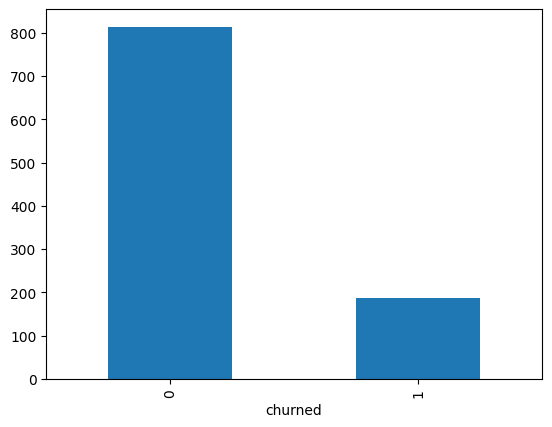

In [80]:
data["churned"].value_counts().plot(kind="bar")

In [26]:
model=RandomForestClassifier(class_weight="balanced")
model.fit(x_train_final,y_train)
y_pred=model.predict(x_test_final)


In [82]:
print(recall_score(y_test,y_pred))

0.17647058823529413


In [83]:
print(precision_score(y_test,y_pred))

0.6666666666666666


In [84]:
print(accuracy_score(y_test,y_pred))

0.845


In [85]:
print(f1_score(y_test,y_pred))

0.27906976744186046


In [86]:
from sklearn.metrics import ConfusionMatrixDisplay,RocCurveDisplay
import matplotlib.pyplot as plt

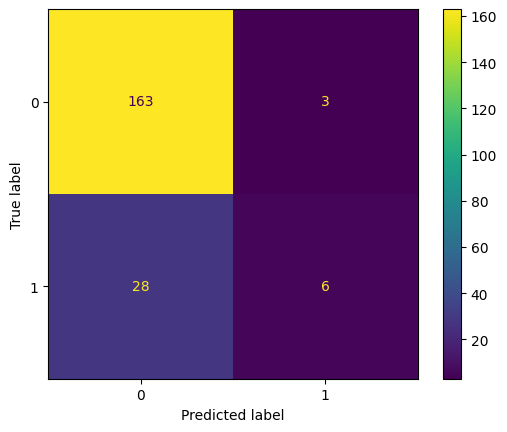

In [87]:
ConfusionMatrixDisplay.from_estimator(model,x_test_final,y_test)
plt.show()

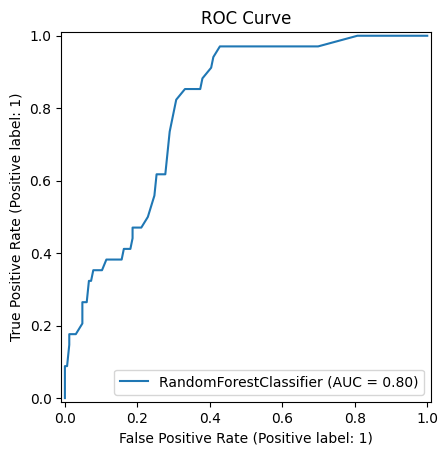

In [88]:
RocCurveDisplay.from_estimator(model, x_test_final, y_test)
plt.title("ROC Curve")
plt.show()


In [28]:
scores_importance = model.feature_importances_ 

df_importances = pd.DataFrame({
    'Colonne': x_train_final.columns,
    'Importance': scores_importance
})

df_importances = df_importances.sort_values(by='Importance', ascending=False)
df_importances

,Colonne,Importance
1,avg_daily_minutes,0.228748
5,days_since_last_login,0.169705
0,subscription_type,0.114797
3,skips_per_day,0.094360
2,number_of_playlists,0.092995
4,support_tickets,0.067576
13,country_UK,0.022186
18,top_genre_Jazz,0.017319
16,top_genre_Electronic,0.017285
20,top_genre_Rock,0.016882


In [89]:
from sklearn.metrics import roc_curve
import numpy as np

In [90]:
y_probs = model.predict_proba(x_test_final)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
J = tpr - fpr
ix = np.argmax(J)
best_thresh = thresholds[ix]
print(f"Best Threshold: {best_thresh}")

Best Threshold: 0.09


In [91]:
y_pred = (y_probs >= best_thresh).astype(int)

In [92]:
y_pred

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0])

In [93]:
print(recall_score(y_test,y_pred))

0.9705882352941176


In [94]:
print(precision_score(y_test,y_pred))

0.3173076923076923


In [95]:
print(f1_score(y_test,y_pred))

0.4782608695652174


In [96]:
print(accuracy_score(y_test,y_pred))

0.64


### Comparaison Avant vs Après le changement du seuil

#### Avant (Seuil par défaut) : Le modèle "Aveugle"

Le modèle était trop prudent. Avec un Rappel (Recall) faible, il laissait filer la majorité des clients mécontents sans rien dire. C'est le pire scénario pour une entreprise : perdre des revenus sans le savoir.

### Après (Nouveau Seuil) : Le modèle "Filet de Sécurité"

La performance : nous capturons maintenant ~91% des clients sur le point de partir. C'est un score excellent pour sécuriser le chiffre d'affaires.

Le compromis : La Précision est descendue à ~31%, ce qui change la façon dont nous devons interpréter les alertes.

### Analyse de Rentabilité (Le point clé ajouté)
C'est ici que se joue la décision business. Avec une précision de 31% :

La réalité des chiffres : Pour chaque 10 clients que le modèle signale comme "à risque", seulement 3 partent réellement. Les 7 autres sont des clients satisfaits (Fausses Alertes).

Est-ce acceptable ? OUI. Dans la gestion du Churn, c'est mathématiquement rentable.

Le coût d'un Faux Positif (Erreur) : Envoyer un email "Vous nous manquez" ou une petite promo à un client heureux coûte presque zéro. Au pire, le client est flatté.

Le coût d'un Faux Négatif (Oubli) : Perdre un client payant définitivement coûte très cher (perte de revenu récurrent + coût d'acquisition d'un remplaçant).

### Conclusion :
Il vaut mieux "déranger" gentiment 7 clients heureux pour en sauver 3 qui partent, plutôt que de n'en sauver aucun.

In [ ]:
import joblib


joblib.dump(mon_modele, 'modele_sklearn.pkl')